# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels 
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib.colors import ListedColormap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)


In [56]:
df=pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [57]:
df.shape

(1000, 3)

In [7]:
df.dtypes

Creditability               int64
CreditAmount                int64
DurationOfCreditInMonths    int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


# 3. Plot Histogram for column 'CreditAmount'

<function matplotlib.pyplot.show(close=None, block=None)>

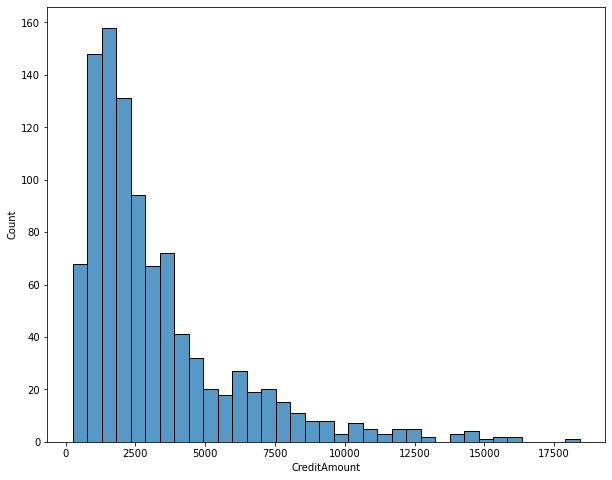

In [58]:
plt.rcParams['figure.figsize']=[10,8]
sns.histplot(df['CreditAmount'])
plt.show

# 3b. Create creditability dataframe

In [59]:
credit=pd.DataFrame(df['Creditability'])
credit.head()


,Creditability
0,1
1,1
2,1
3,1
4,1


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [60]:
df['Creditability'].value_counts()


1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

<function matplotlib.pyplot.show(close=None, block=None)>

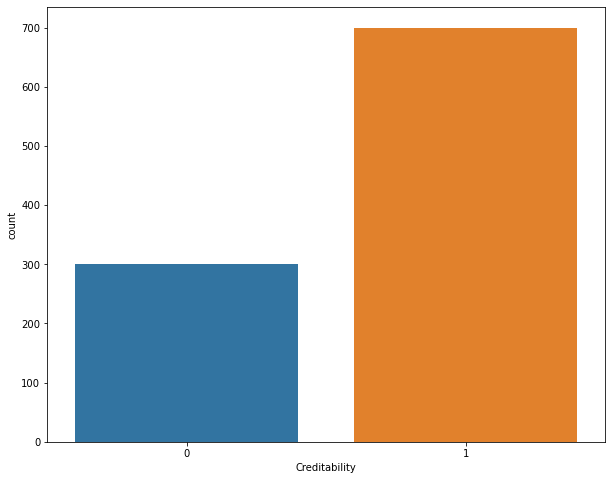

In [61]:
plt.figure(figsize=(10,8))
sns.countplot(x="Creditability", data=df)
plt.show

# 6. Prepare input data for the model

<Figure size 720x576 with 0 Axes>

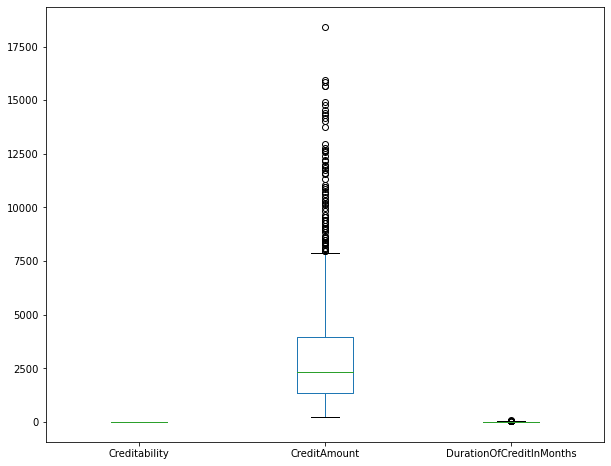

In [62]:
plt.figure(figsize=(10,8))
df.plot(kind='box')
plt.show()

In [63]:
Q1=df['CreditAmount'].quantile(0.25)
Q3=df['CreditAmount'].quantile(0.75)
IQR=Q3-Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df=df[~((df['CreditAmount']<LL) | (df['CreditAmount']>UL))]
df.shape

(928, 3)

<Figure size 720x576 with 0 Axes>

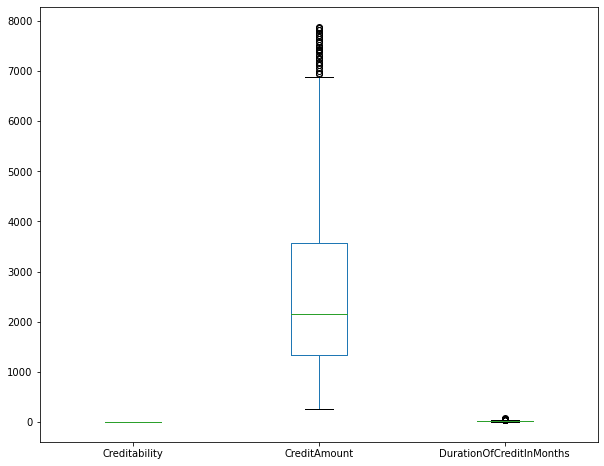

In [64]:
plt.figure(figsize=(10,8))
df.plot(kind='box')
plt.show()

In [65]:
df.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

In [66]:
df_feature=df.drop('Creditability',axis=1)
df_target=df['Creditability']

In [67]:
df_num=df_feature.select_dtypes(include=np.number)

In [68]:
df_num=df_num.apply(lambda x:(x-x.mean())/(x.std()))
df_num

,CreditAmount,DurationOfCreditInMonths
0,-0.909428,-0.142455
1,0.068602,-0.965836
2,-1.025674,-0.691376
3,-0.309756,-0.691376
4,-0.282371,-0.691376
...,...,...
994,1.968774,-0.691376
995,-0.385204,0.406465
996,-0.208600,0.406465
998,2.119111,-0.691376


In [69]:
#split the data into train and test 

X = sm.add_constant(df)
X_train,X_test,y_train,y_test=train_test_split(df_num,df_target,random_state=10,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((649, 2), (279, 2), (649,), (279,))

# 7. Fit logistic regression model

In [70]:
logreg=sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.674774
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Creditability   No. Observations:                  649
Model:                          Logit   Df Residuals:                      647
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                 -0.1290
Time:                        22:39:32   Log-Likelihood:                -437.93
converged:                       True   LL-Null:                       -387.88
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CreditAmount                 0.1865      0.101      1.855      0.064      -0.011       0.384
DurationOfCreditInMonths    -0.4807      0.104     -4.616      0.000      -0.685      -0.277
============================================================================================
"""

# 8. Test accuracy calculation

In [71]:
ypred_prob=logreg.predict(X_test)
ypred_prob

554    0.565065
434    0.546155
642    0.548525
429    0.626760
245    0.472333
         ...   
163    0.567069
457    0.497961
316    0.422667
327    0.612360
264    0.552064
Length: 279, dtype: float64

In [72]:
ypred=[0 if x<0.5 else 1 for x in ypred_prob]
ypred[0:5]

[1, 1, 1, 1, 0]

In [73]:
report=classification_report(y_test,ypred)
print(report)

              precision    recall  f1-score   support

           0       0.37      0.58      0.45        76
           1       0.80      0.64      0.71       203

    accuracy                           0.62       279
   macro avg       0.59      0.61      0.58       279
weighted avg       0.68      0.62      0.64       279



In [74]:
accuracy_score(y_test,ypred)

0.6200716845878136

# 9. Build a confusion matrix

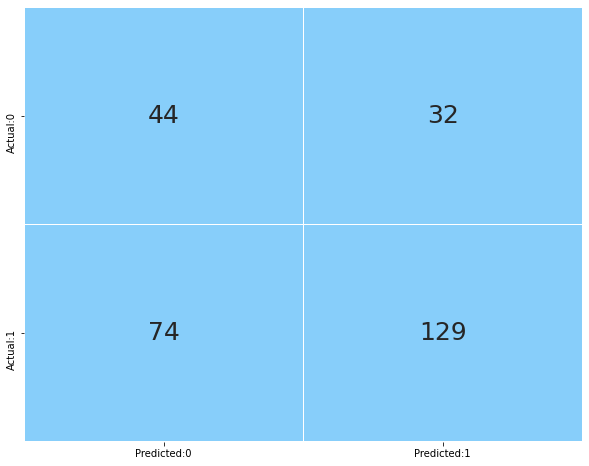

In [75]:
cm=confusion_matrix(y_test,ypred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['lightskyblue']),cbar=False,annot_kws={'size':25},linewidths=0.2)
plt.show()

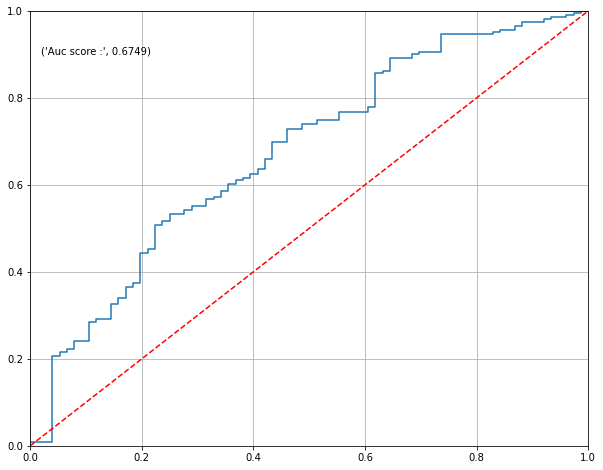

In [76]:
fpr,tpr,thresholds=roc_curve(y_test,ypred_prob)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.02,y=0.9,s=('Auc score :',round(roc_auc_score(y_test,ypred_prob),4)))
plt.grid(True)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults